# We are analysing and visualising a dataset which contains the data for 911 calls in Montgomery County, PA

### Import the required libraries

In [1]:
import pandas as pd
import numpy as np


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("911.csv")

### Get the Data Frame info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


### Get the Data Frame head info

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


# ~Questions we can answer

### Top 5 Zipcodes for 911 calls

In [6]:
df['zip'].value_counts().head(5)

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

### Top 5 townships(twp) for 911 calls

In [7]:
df['twp'].value_counts().head(5)

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

In [8]:
len(df['title'].unique())

110

# Create new features

### Splitting existing "Title" column and creating new "Reason" column by using Lambda Function

In [9]:
df['Reason']=df['title'].apply(lambda title: title.split(":")[0])

In [10]:
df['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

### Number of calls by reason

In [11]:
df['Reason'].value_counts()

Reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

### Most common reason for a 911 call 

In [12]:
df['Reason'].value_counts().head(1)

Reason
EMS    48877
Name: count, dtype: int64

## Creat a countplot of 911 calls by reason

<Axes: xlabel='Reason', ylabel='count'>

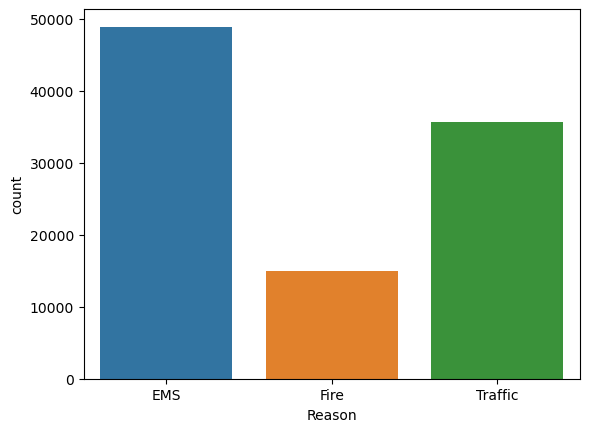

In [13]:
sns.countplot(x='Reason',data=df)

### Convert data type of the column "Time stamp" from string to DateTime objects

In [14]:
df['timeStamp']= pd.to_datetime(df['timeStamp'])

In [15]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
time=df['timeStamp'].iloc[0]
time.hour

17

In [17]:
time.dayofweek

3

#### Create Hour Column

In [18]:
df['Hour']=df['timeStamp'].apply(lambda time:time.hour)

#### Create Month and day of Week Columns

In [19]:
df['Month']= df['timeStamp'].apply(lambda time: time.month)
df['Day of Week']= df['timeStamp'].apply(lambda time: time.dayofweek)

In [20]:
dmap={0:'Mon', 1:'Tue', 2:'Wed', 3: 'Thu', 4: 'Fri', 5:'Sat', 6: 'Sun'}
df['Day of Week']=df['Day of Week'].map(dmap)

## Countplot of the day of Week column with the hue based off of the Reason column

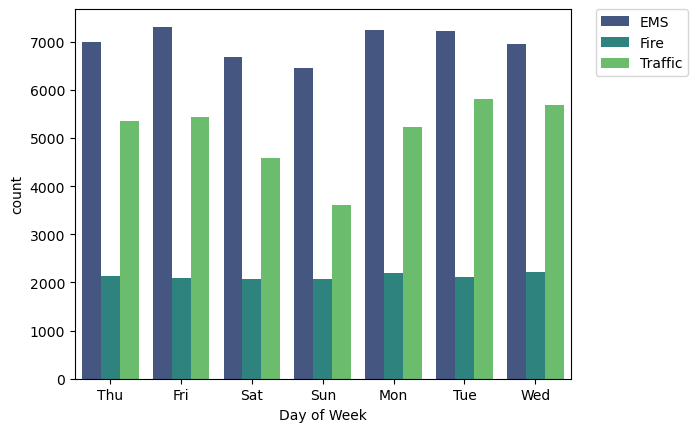

In [21]:
sns.countplot(x='Day of Week',data=df, hue='Reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

## Countplot of the Month column with the hue based off of the Reason column

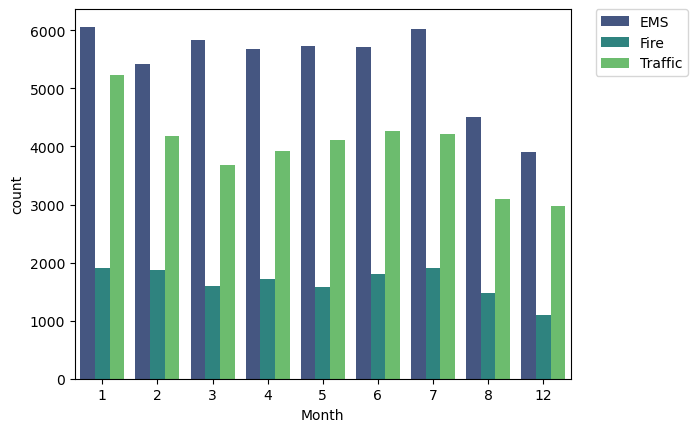

In [22]:
sns.countplot(x='Month',data=df, hue='Reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

# Use Pandas to shed some light on the missing months and creating a line plot

### Create a groupby object called byMonth, where you group the DataFrame by month column and use the count() method to aggregate.

In [23]:
byMonth=df.groupby('Month').count()

In [24]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


### Creating a plot off of the dataframe indicating calls per month to see the trends between the 8th and 12th months

<Axes: xlabel='Month'>

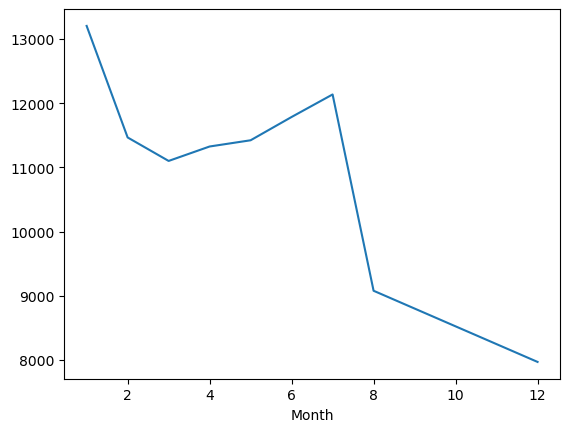

In [26]:
byMonth['lat'].plot()

## Use Seaborn's lmplot() to create a linear fit on the number of calls per month

C:\Users\gsingh8\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


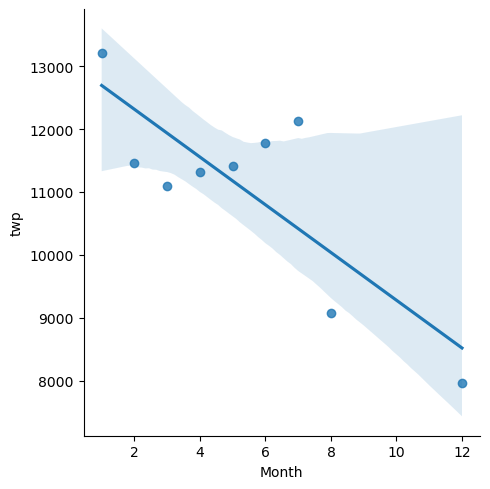

In [28]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

### Create a new Column called 'Date' that contains the date from the timeStamp column

In [37]:
df['Date']=df['timeStamp'].apply(lambda t:t.date())

### Groupby the Date column with the count() aggregate and create a plot of the number of 911 calls

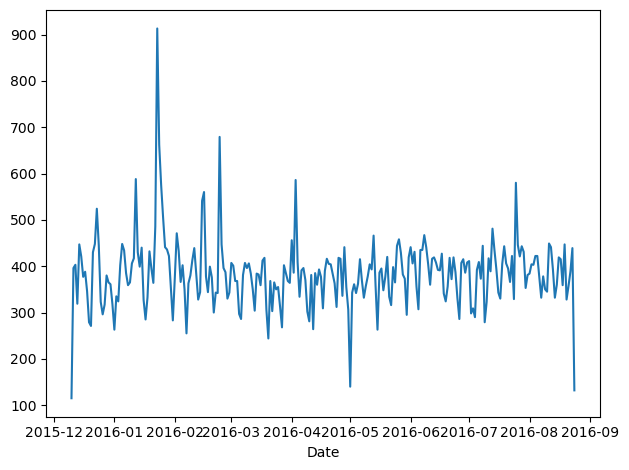

In [43]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

# Create 3 separate plots with each plot representing a reason for the 911 Call

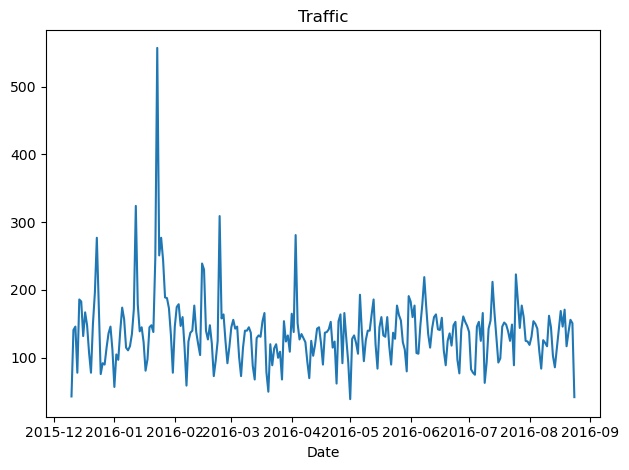

In [51]:
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title("Traffic")
plt.tight_layout()

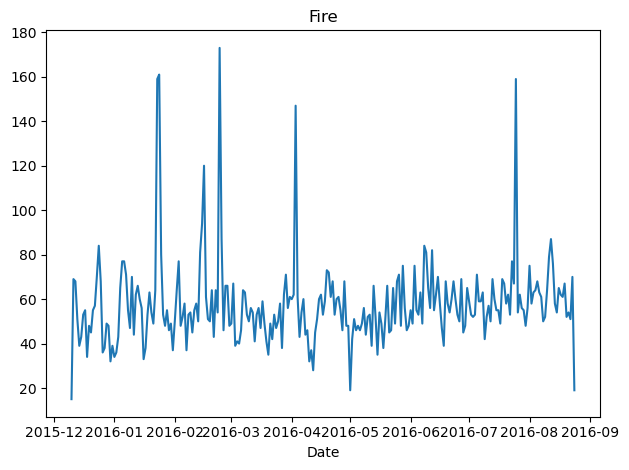

In [52]:
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

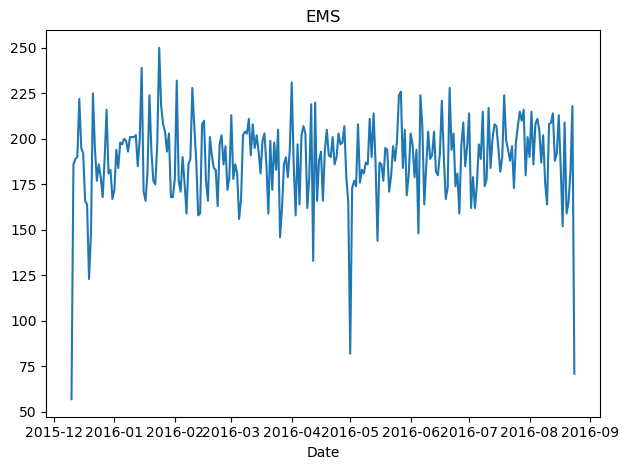

In [53]:
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title("EMS")
plt.tight_layout()

# Heat maps with seaBorn

In [57]:
dayHour= df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()

<Axes: xlabel='Hour', ylabel='Day of Week'>

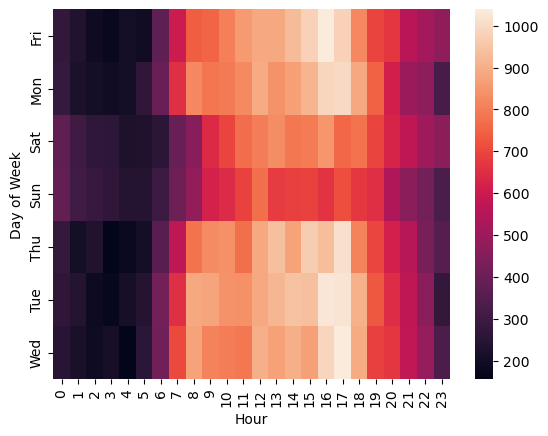

In [58]:
sns.heatmap(dayHour)

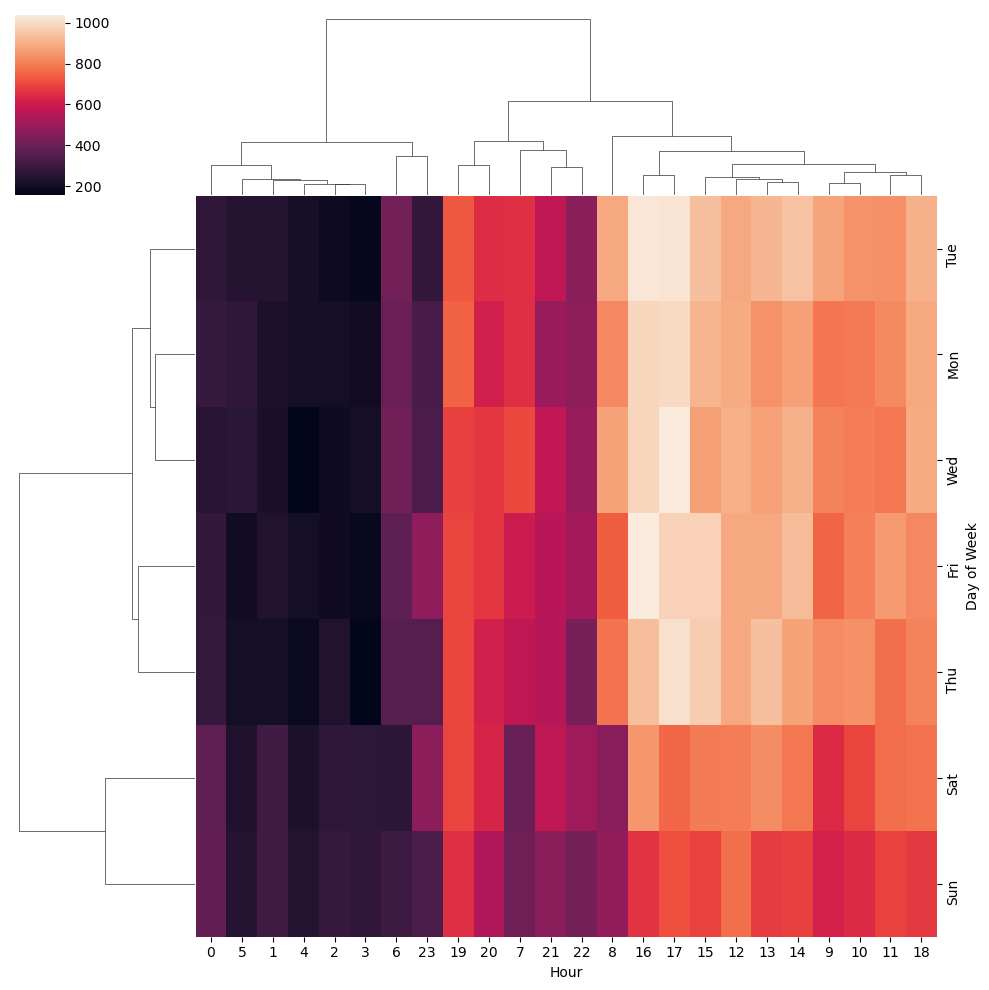

In [59]:
sns.clustermap(dayHour)